## Titanic Project
### Problem Statement:
The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early
1912. It gives you information about multiple people like their ages, sexes, sibling
counts, embarkment points, and whether or not they survived the disaster. 

### Prediction:
Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the
sinking or not.

### Dataset Overview:
- PassengerId: Unique identifier for each passenger (not useful for prediction).
- Survived: Indicates if a passenger survived (1) or not (0). (This is a good target for binary classification).
- Pclass: Ticket class (1st, 2nd, or 3rd).
- Name: Text feature, usually not directly useful unless you extract meaningful features (like titles).
- Sex: Categorical feature (male/female).
- Age: Age of passengers.
- SibSp: Number of siblings/spouses aboard.
- Parch: Number of parents/children aboard.
- Ticket: Mixed data type; may require feature engineering.
- Fare: Passenger fare.
- Cabin: Cabin during stay.
- Embarked: Port of embarkation

### Libraries

In [5]:
import pandas as pd
import pandas as np
import matplotlib.pyplot as plt
#The line %matplotlib inline is a special command used in Jupyter Notebooks or JupyterLab environments. It tells the notebook interface to display matplotlib plots directly within the notebook itself, rather than in a separate window or file.
%matplotlib inline

import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler

In [6]:
#Import the Data

data = pd.read_csv(r"C:\Users\sharm\Downloads\Datasets\titanic_train.csv")

In [7]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### EDA

In [10]:
data.shape

(891, 12)

In [11]:
print(data.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [12]:
# There exists null values in Age, Cabin and Embarked

### Statistical Analysis

In [14]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


As we have categorical column we need to convert into numeric data using encoding method.

### Handle Null data

In [25]:
# Handling Null Values in Dataset

# For numerical columns
data['Age'] = data['Age'].fillna(data['Age'].mean())

# For catergorical columns
data['Cabin'] = data['Cabin'].fillna(data['Cabin'].mode())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode())

In [27]:
print(data.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          685
Embarked         2
dtype: int64


In [29]:
# Missing values present in cabin and embarked

### Handling Missing Values

In [32]:
data['Cabin'].fillna(data['Cabin'].mode()[0], inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [34]:
print(data.isna().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [37]:
data=data.drop('PassengerId',axis=1)

### Feature Engineering

In [41]:
# Extract titles from the Name column
data['Title'] = data['Name'].str.extract(r'(\bMr\.|\bMrs\.|\bMiss\.|\bMaster\.|\bDr\.|\bRev\.)')

# Display result
(data[['Name', 'Title']])

,Name,Title
0,"Braund, Mr. Owen Harris",Mr.
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs.
2,"Heikkinen, Miss. Laina",Miss.
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs.
4,"Allen, Mr. William Henry",Mr.
...,...,...
886,"Montvila, Rev. Juozas",Rev.
887,"Graham, Miss. Margaret Edith",Miss.
888,"Johnston, Miss. Catherine Helen ""Carrie""",Miss.
889,"Behr, Mr. Karl Howell",Mr.


### Encoding

In [45]:
# Encode categorical columns (e.g., one-hot encoding or label encoding)

#Creates a copy of the original DataFrame
data1 = data.copy()

#filters columns in the DataFrame that have a datatype of object=strings
for col in data.select_dtypes(include='object').columns:
    # data[col].astype('category')==Converts the column to a category datatype.
    # .cat.codes== Converts each category in the column into a numeric code (label encoding)
    data1[col] = data1[col].astype('category').cat.codes  # Label encoding

In [47]:
data1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,108,1,22.0,1,0,523,7.2500,47,2,3
1,1,1,190,0,38.0,1,0,596,71.2833,81,0,4
2,1,3,353,0,26.0,0,0,669,7.9250,145,2,2
3,1,1,272,0,35.0,1,0,49,53.1000,55,2,4
4,0,3,15,1,35.0,0,0,472,8.0500,47,2,3


### Visualize the data

#### 1. Univariate Analysis

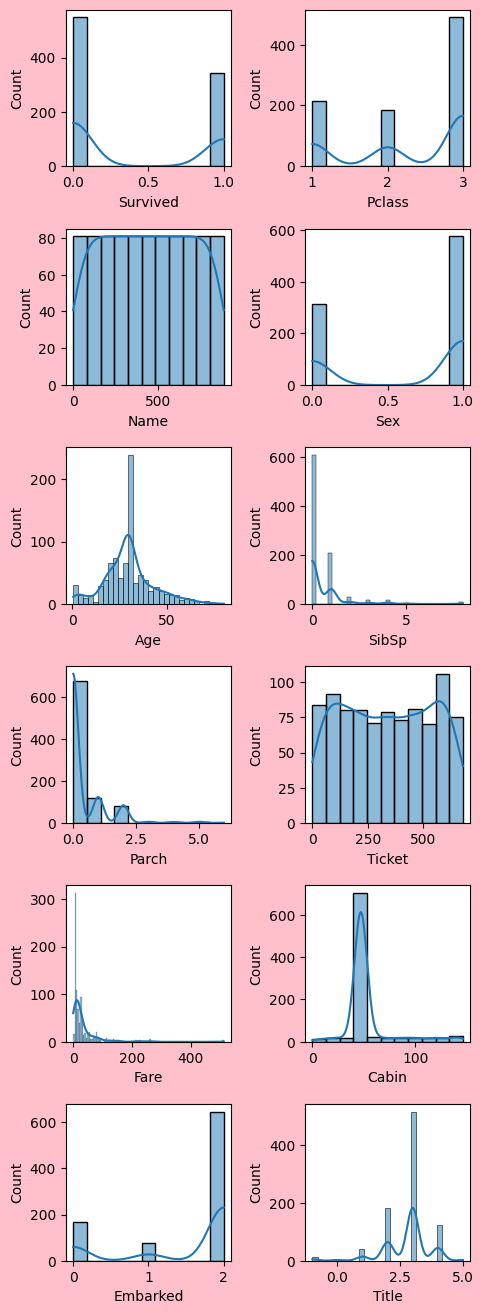

In [52]:
# Set the figure size

plt.figure(figsize=(5,15),facecolor='pink')

# Create subplots for bivariate analysis (scatter plots)
plotnumber=1

# Iterate through all of columns
for column in data1:
  if plotnumber<=13:
        ax=plt.subplot(7,2,plotnumber)        # Adjust subplot grid size as needed
        sns.histplot(data1[column], kde=True)
        plt.xlabel(column,fontsize=10)        # Set x label
  plotnumber+=1
plt.tight_layout()
plt.show()

#### 2. Bivariate Analysis

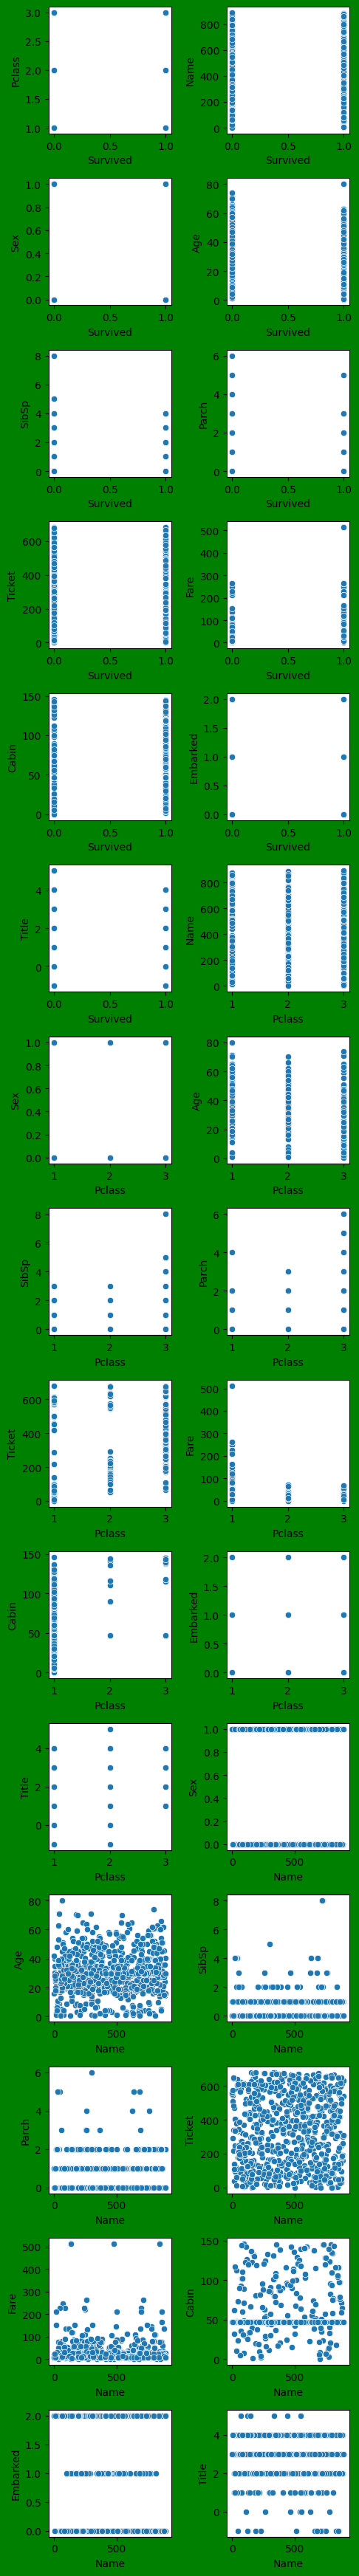

In [54]:
plt.figure(figsize=(5, 35), facecolor='green')

plotnumber = 1

for i in range(len(data1.columns)):
    for j in range(i + 1, len(data1.columns)):
        if plotnumber <= 30:
            ax = plt.subplot(15, 2, plotnumber)  
            sns.scatterplot(x=data1.iloc[:, i], y=data1.iloc[:, j], ax=ax, data=data1)  
            ax.set_xlabel(data1.columns[i])  
            ax.set_ylabel(data1.columns[j])  
        plotnumber += 1

plt.tight_layout()
plt.show()

#### 3. Multivariate Analysis (Correlation Matrix)

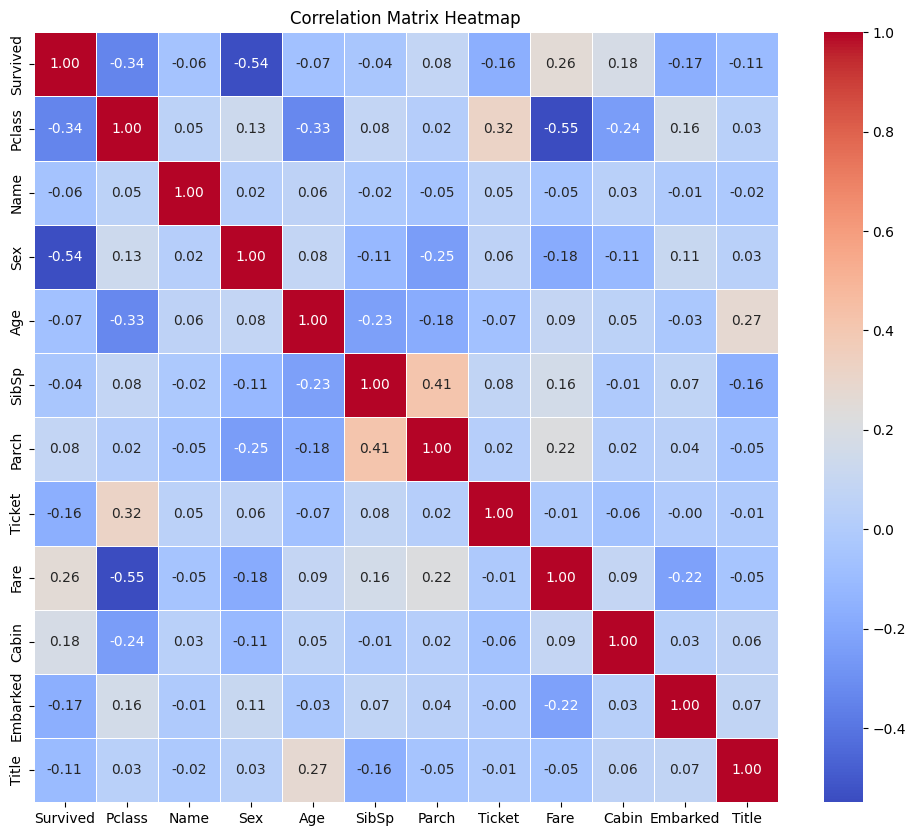

In [56]:
# Calculate the correlation matrix
correlation_matrix = data1.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

No Multicollinearity is present

### Train Test Split
--> Training is for learning Purpose

--> Test is for checking Purpose

In [60]:
# Let's prepare the data for modeling 
# Define features (X) and target (y)
x = data1.drop(['Name', 'Survived'], axis=1)
y = data1['Survived']

In [61]:
print(y.value_counts(normalize=True))

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


In [62]:
import numpy as np
from scipy.stats import zscore

# Assuming 'x' is your feature matrix and 'y' is the target vector
z_scores = np.abs(zscore(x))  # Use np.abs() here
x_no_outliers = x[(z_scores < 3).all(axis=1)]
y_no_outliers = y[(z_scores < 3).all(axis=1)]

In [64]:
#Lets split the data into a train test spli
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=94255)

In [65]:
# Create the scaler
scaler = StandardScaler()

# Fit the scaler on the data and transform it
x_trainscaled = scaler.fit_transform(xtrain)
x_testscaled = scaler.transform(xtest)

### The Variance Inflation Factor (VIF)
It is used to detect multicollinearity in a regression model. Multicollinearity occurs when two or more independent variables are highly correlated, which can affect the accuracy of the regression coefficients.

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [68]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_trainscaled,i) for i in range (x_trainscaled.shape[1])]

vif['Features']=x.columns
#Lets Check the Values 

vif

,vif,Features
0,2.217779,Pclass
1,1.113579,Sex
2,1.313904,Age
3,1.300138,SibSp
4,1.315561,Parch
5,1.221711,Ticket
6,1.841199,Fare
7,1.081376,Cabin
8,1.078499,Embarked
9,1.131896,Title


VIF = 1: No correlation with other variables (no multicollinearity).

1 < VIF < 5: Moderate correlation with other variables. It’s usually acceptable.

### Model Performance

#### 1. Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier

# Choose the classifier
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(xtrain, ytrain)

# Make predictions
ypred_rf = rf.predict(xtest)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(ytest, ypred_rf))
print("="*60)
print("\nClassification Report:\n")
print(classification_report(ytest, ypred_rf))
print("="*60)
print("Confusion Matrix:\n")
print(confusion_matrix(ytest, ypred_rf))

Accuracy: 0.8295964125560538

Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       132
           1       0.79      0.79      0.79        91

    accuracy                           0.83       223
   macro avg       0.82      0.82      0.82       223
weighted avg       0.83      0.83      0.83       223

Confusion Matrix:

[[113  19]
 [ 19  72]]


In [73]:
print(pd.Series(ypred_rf).value_counts())

0    132
1     91
Name: count, dtype: int64


#### 2. SVM

In [75]:
from sklearn.svm import SVC

# Initialize and fit the SVM model
svm = SVC()
svm.fit(xtrain, ytrain)

# Make predictions using the fitted model
ypred_svm = svm.predict(xtest)

# Evaluate the model
print("Accuracy:", accuracy_score(ytest, ypred_svm))
print("="*60)
print("\nClassification Report:\n")
print(classification_report(ytest, ypred_svm))
print("="*60)
print("Confusion Matrix:\n")
print(confusion_matrix(ytest, ypred_svm))

Accuracy: 0.6502242152466368

Classification Report:

              precision    recall  f1-score   support

           0       0.65      0.87      0.75       132
           1       0.64      0.33      0.43        91

    accuracy                           0.65       223
   macro avg       0.65      0.60      0.59       223
weighted avg       0.65      0.65      0.62       223

Confusion Matrix:

[[115  17]
 [ 61  30]]


#### 3. Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(xtrain, ytrain)

# Make predictions
ypred_lr = lr.predict(xtest)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(ytest, ypred_lr))
print("="*60)
print("\nClassification Report:\n")
print(classification_report(ytest, ypred_lr))
print("="*60)
print("Confusion Matrix:\n")
print(confusion_matrix(ytest, ypred_lr))

Accuracy: 0.7847533632286996

Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.86      0.82       132
           1       0.77      0.68      0.72        91

    accuracy                           0.78       223
   macro avg       0.78      0.77      0.77       223
weighted avg       0.78      0.78      0.78       223

Confusion Matrix:

[[113  19]
 [ 29  62]]


### Cross Validation of Random Forest

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Perform 5-fold cross-validation (you can adjust the number of folds as needed)
cv_scores = cross_val_score(rf, x, y, cv=5, scoring='accuracy')

# Output the cross-validation scores for each fold
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())

Cross-Validation Scores: [0.83240223 0.82022472 0.86516854 0.81460674 0.85393258]
Mean Accuracy: 0.8372669637813068
Standard Deviation: 0.019410462065832555


### HyperParameter Tuning

In [81]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(x, y)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Best Accuracy: 0.8417487916640513


In [91]:
# Access the best model from GridSearchCV
best_rf_model = grid_search.best_estimator_

# Evaluate the model on the test set
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test set
y_pred = best_rf_model.predict(xtest)

### Evaluation

In [100]:
# Accuracy
print("Test Set Accuracy:", accuracy_score(ytest, y_pred))

# Classification Report
print("="*60)
print("\nClassification Report:\n")
print(classification_report(ytest, y_pred))

# Confusion Matrix
print("="*60)
print("Confusion Matrix:\n")
print(confusion_matrix(ytest, y_pred))

Test Set Accuracy: 0.905829596412556

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       132
           1       0.92      0.85      0.88        91

    accuracy                           0.91       223
   macro avg       0.91      0.90      0.90       223
weighted avg       0.91      0.91      0.91       223

Confusion Matrix:

[[125   7]
 [ 14  77]]


### Confusion Matrix

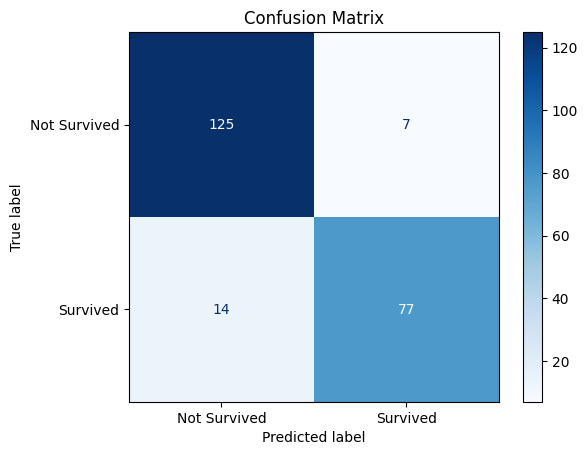

In [103]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(ytest, y_pred)

# Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Survived', 'Survived'])

# Plot the confusion matrix
disp.plot(cmap='Blues')  # You can change 'Blues' to any other color map
plt.title("Confusion Matrix")
plt.show()

### Saving the model

In [106]:
import pickle

model = best_rf_model

# Save the model to a file
with open("Titanic_model.pkl", "wb") as file:
    pickle.dump(model, file)

### Key Points:
- Use "wb" mode for writing (binary format).
- Use "rb" mode for reading.
- Ensure that all dependencies (e.g., scikit-learn version) remain the same when loading the model.